In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df = df.dropna(subset=['title', 'type', 'release_year'])
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

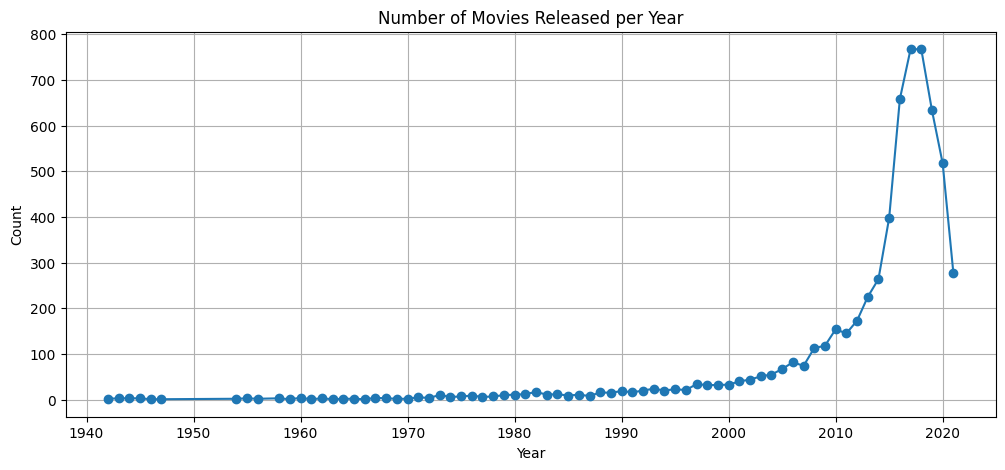

In [ ]:
movies_per_year = movies_df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,5))
movies_per_year.plot(kind='line', marker ='o')
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid()
plt.show()

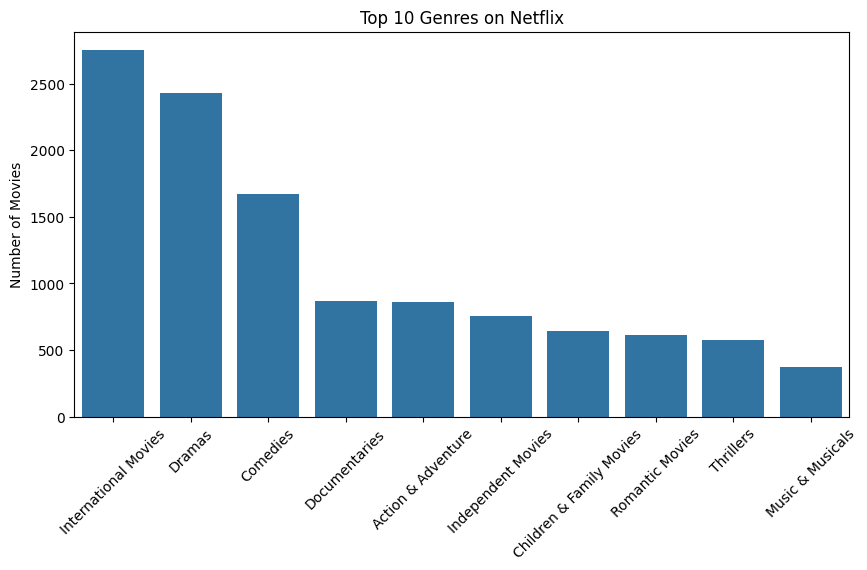

In [ ]:
from collections import Counter

genre_list = movies_df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_list for genre in sublist]
genre_counts = Counter(flat_genres)
top_genres = genre_counts.most_common(10)

# Plot
genres, counts = zip(*top_genres)
plt.figure(figsize=(10,5))
sns.barplot(x=list(genres), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Number of Movies")
plt.show()

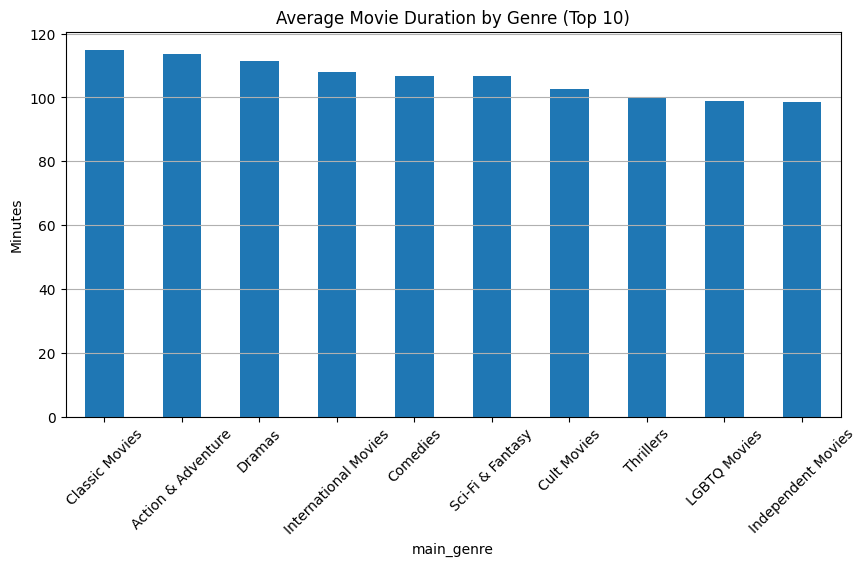

In [ ]:
movies_df['main_genre'] = movies_df['listed_in'].str.split(', ').str[0]

avg_duration = movies_df.groupby('main_genre')['duration_minutes'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
avg_duration.plot(kind='bar')
plt.title("Average Movie Duration by Genre (Top 10)")
plt.ylabel("Minutes")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

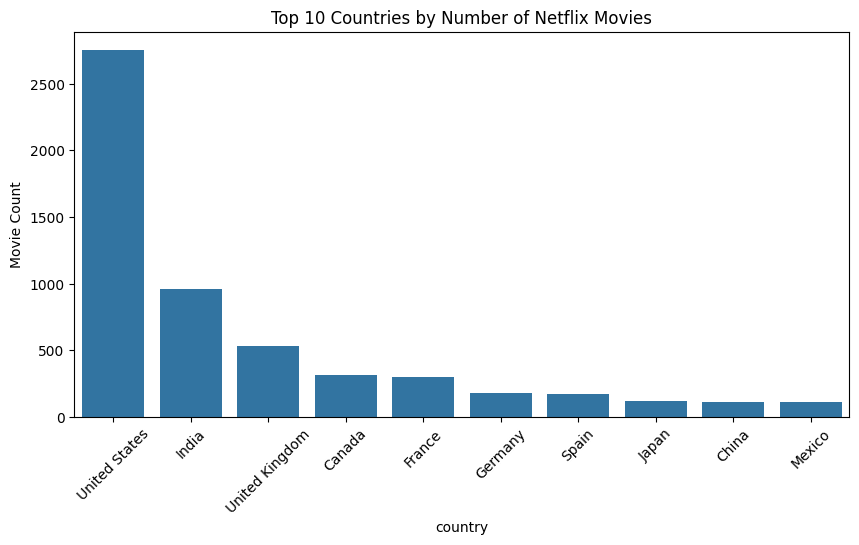

In [ ]:
country_counts = movies_df['country'].dropna().str.split(', ').explode().value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Top 10 Countries by Number of Netflix Movies")
plt.ylabel("Movie Count")
plt.xticks(rotation=45)
plt.show()